# <center>  Linear Regression</center>

## Import Libraries

In [1]:
import time
import math
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset 

In [2]:
df = pd.read_csv('Medical Price Dataset.csv')

## Data pre-processing

In [3]:
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [5]:
print(df.isnull().sum())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Looking for how many unique values there are in the categorical features

In [6]:
print('Different regions - ', df['region'].unique())
print('Different numbers of children - ', df['children'].unique())

Different regions -  ['southwest' 'southeast' 'northwest' 'northeast']
Different numbers of children -  [0 1 3 2 5 4]


Adding a log charges as well as charges to train a model to later

In [7]:
df['log_charges'] = np.log(df['charges'])

In [8]:
print('bmi correlation - ', df['charges'].corr(df['bmi']))
print('age correlation - ', df['charges'].corr(df['age']))

bmi correlation -  0.19834096883362887
age correlation -  0.2990081933306478


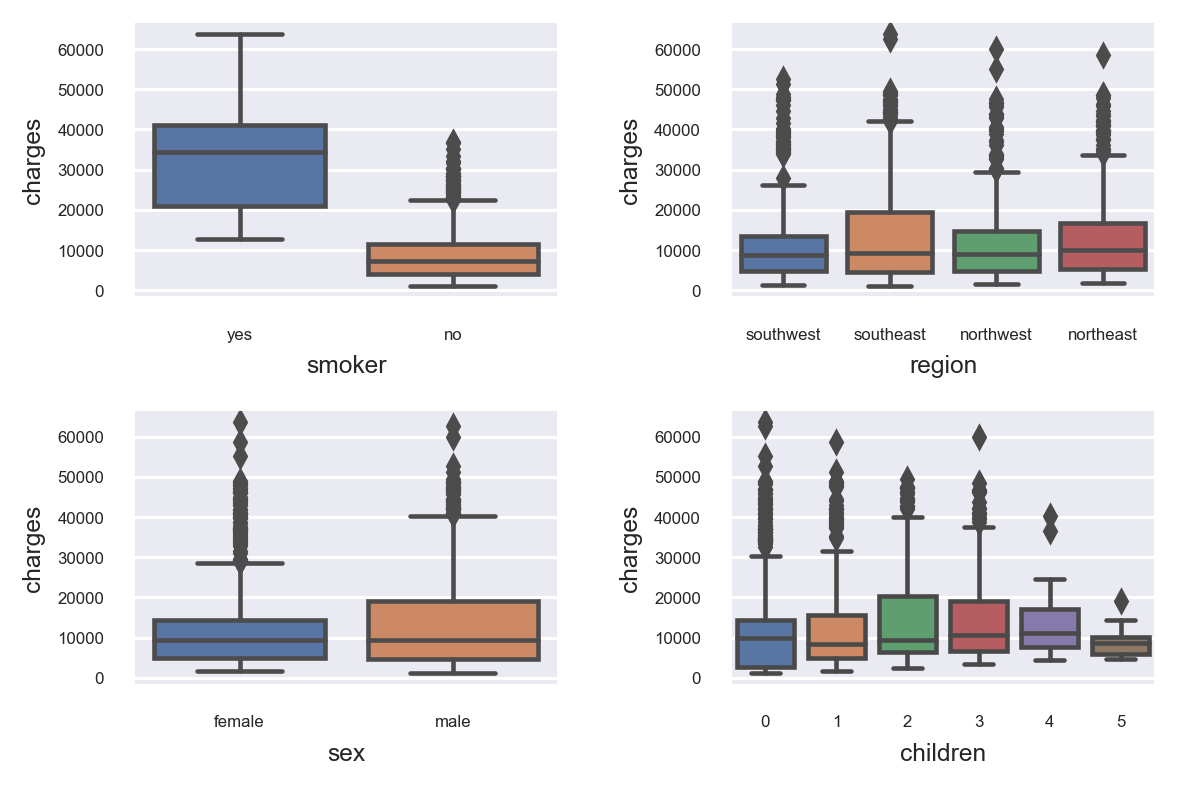

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


In [9]:
# Adjusting the font size of the figures to match the overall figure size
sns.set(font_scale = 0.5)

# Plotting box and whiskers to show the distribution of charges according to these features
fig = plt.figure(dpi=220)
plt.rcParams["axes.labelsize"] = 8
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.boxplot(data=df, x='smoker', y='charges', ax=ax)
ax = fig.add_subplot(2, 2, 2)
sns.boxplot(data=df, x='region', y='charges', ax=ax)
ax = fig.add_subplot(2, 2, 3)
sns.boxplot(data=df, x='sex', y='charges', ax=ax)
ax = fig.add_subplot(2, 2, 4)
sns.boxplot(data=df, x='children', y='charges', ax=ax)
plt.show()
sns.set(font_scale = 1)

# How many are in each category of children
print(df['children'].value_counts())

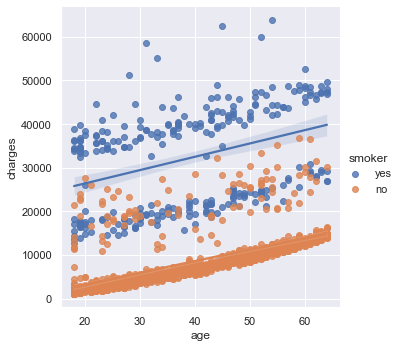

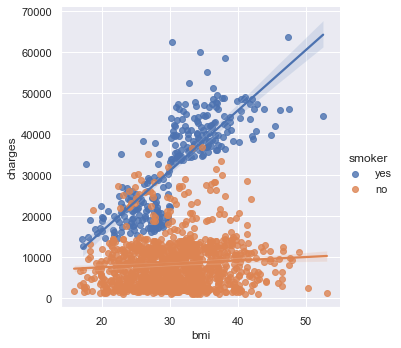

In [10]:
# Scatter plots to show the correlation between features and charges
sns.lmplot(data=df, x='age', y='charges', hue='smoker')
plt.show()
sns.lmplot(data=df, x='bmi', y='charges', hue='smoker')
plt.show()

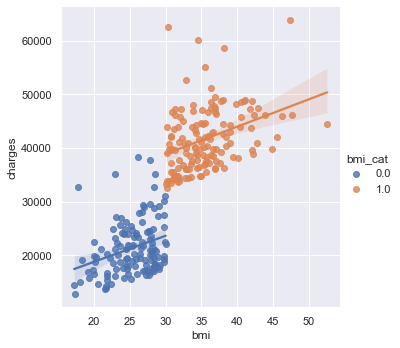

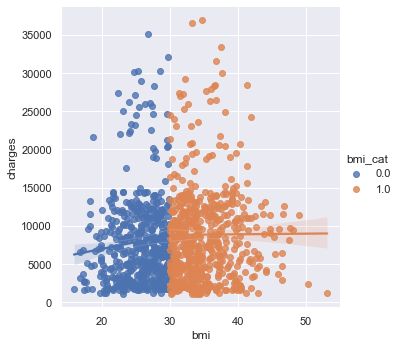

In [11]:
# Creates a new categorical feature for bmi (30 is the cuttoff point for obese)
df['bmi_cat'] = np.nan
df.loc[df['bmi'] <= 30, 'bmi_cat'] = 0
df.loc[df['bmi'] > 30, 'bmi_cat'] = 1

sns.lmplot(data=df[df['smoker'] == 'yes'], x='bmi', y='charges', hue='bmi_cat')
plt.show()
sns.lmplot(data=df[df['smoker'] == 'no'], x='bmi', y='charges', hue='bmi_cat')
plt.show()

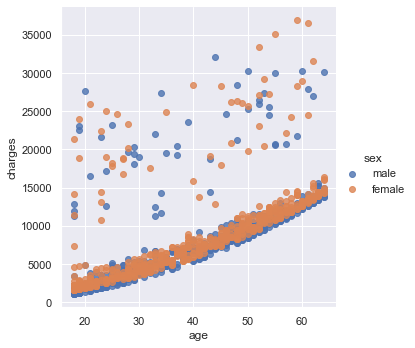

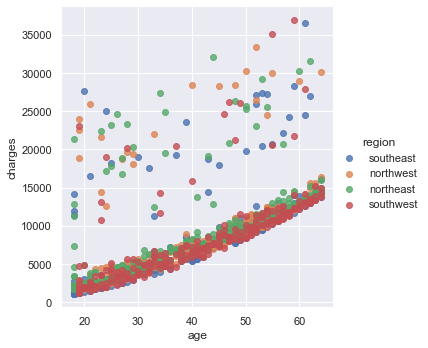

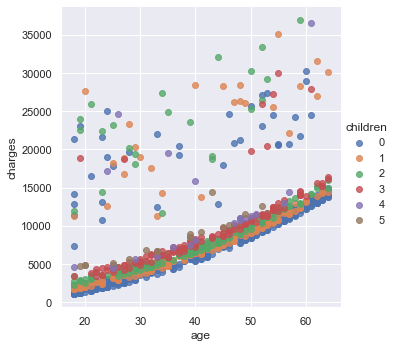

In [12]:
sns.lmplot(data=df[df['smoker'] == 'no'], x='age', y='charges', hue='sex', fit_reg=False)
plt.show()
sns.lmplot(data=df[df['smoker'] == 'no'], x='age', y='charges', hue='region', fit_reg=False)
plt.show()
sns.lmplot(data=df[df['smoker'] == 'no'], x='age', y='charges', hue='children', fit_reg=False)
plt.show()

Showing the correlation for various subgroups within the data


In [13]:
print('bmi correlation (smokers) - ', df[df['smoker'] == 'yes']['charges'].corr(df['bmi']), '\n')
print('bmi correlation (smokers & bmi > 30) - ', 
      df[(df['smoker'] == 'yes') & (df['bmi'] > 30)]["charges"].corr(df['bmi']))
print('bmi correlation (smokers & bmi < 30) - ', 
      df[(df['smoker'] == 'yes') & (df['bmi'] > 30)]['charges'].corr(df['bmi']), '\n')
print('bmi correlation (non-smokers) - ', df[(df['smoker'] == 'no')]['charges'].corr(df['bmi']))
print('age correlation (smokers) - ', df[df['smoker'] == 'yes']['charges'].corr(df['age']))
print('age correlation (non-smokers) - ', df[(df['smoker'] == 'no')]['charges'].corr(df['age']))

bmi correlation (smokers) -  0.8064806070155403 

bmi correlation (smokers & bmi > 30) -  0.36506249418736847
bmi correlation (smokers & bmi < 30) -  0.36506249418736847 

bmi correlation (non-smokers) -  0.08403654312833271
age correlation (smokers) -  0.3682244437307777
age correlation (non-smokers) -  0.6279467837664197


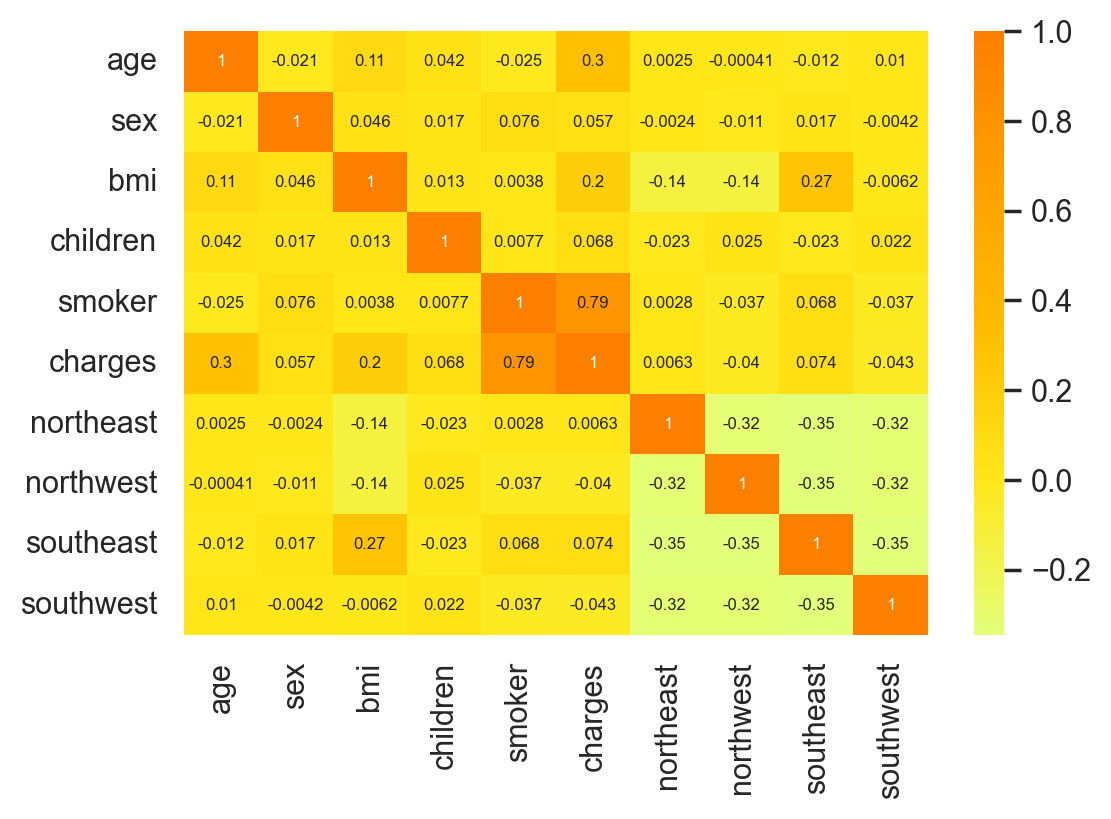

In [14]:
df['smoker'].replace(('yes', 'no'), (1, 0), inplace=True)
df['sex'].replace(('male', 'female'), (1, 0), inplace=True)

# Converts categorical data with more than two categories into a set of new features
# one for each different value in the old feature and only 1/0 as possible values
dummies = pd.get_dummies(df['region'])
df = pd.concat((df, dummies), axis = 1)
df = df.drop('region', axis = 1)

# Creating a Pearson correlation matrix to visualise correlations between features
df_corr = df.drop(['log_charges', 'bmi_cat'], axis = 1)
corr = df_corr.corr()
fig, ax = plt.subplots(dpi=200)
sns.heatmap(corr, cmap = 'Wistia', annot= True, ax=ax, annot_kws={"size": 6})
plt.show()

A new df where we split up the number of children into new features to check for correlations

In [15]:
df_children = df[['charges', 'children']]

dummies_children = pd.get_dummies(df_children['children'])
df_children = pd.concat((df_children, dummies_children), axis = 1)
df_children = df_children.drop('children', axis = 1)

print('0 children - ', df_children['charges'].corr(df_children[0]))
print('1 children - ', df_children['charges'].corr(df_children[1]))
print('2 children - ', df_children['charges'].corr(df_children[2]))
print('3 children - ', df_children['charges'].corr(df_children[3]))
print('4 children - ', df_children['charges'].corr(df_children[4]))
print('5 children - ', df_children['charges'].corr(df_children[5]))

0 children -  -0.06476047639409552
1 children -  -0.02518035435360182
2 children -  0.06963892513022249
3 children -  0.06279529451603875
4 children -  0.00661391571766469
5 children -  -0.043258372948824925


In [16]:
def linear_func(X, th0, th1):
    return (X * th1) + th0

def cost_func(X, y, th0, th1):
    mm = len(X)
    return (1/2*mm) * np.sum((linear_func(X, th0, th1) - y)**2)

# The partial derivative of the cost function with respect to theta 0
def grad_descent_th0(X, y, alpha, th0, th1):
    mm = len(X)
    return (alpha / mm) * np.sum(linear_func(X, th0, th1) - y)

# The partial derivative of the cost function with respect to theta 1
def grad_descent_th1(X, y, alpha, th0, th1):
    mm = len(X)
    return (alpha / mm) * np.sum((linear_func(X, th0, th1) - y)*X)

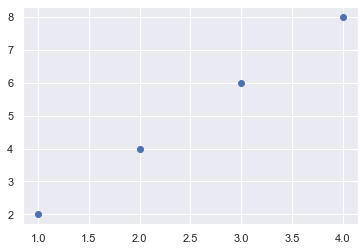

theta0 -  -4.9883369322054325e-06
theta1 -  2.000001696642868
final cost -  3.324681291387064e-11


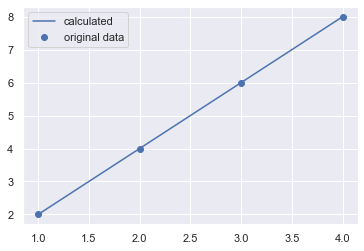

In [17]:
# Creating simple dummy values to fit a linear model to
X = np.array([1,2,3,4])
y = np.array([2,4,6,8])

plt.scatter(X, y)
plt.show()

# these are our inital guesses for the values of theta0 and theta1 (they do not have to be good guesses)
th0 = -15
th1 = 16
# The optimization parameter controls how quickly we descend the gradient
alpha = 0.1
loops = 1000

for ii in range(loops):
    # We must store the values in temporary holders so we can use the same values for both gradiant descent parts
    temp_th0 = th0 - grad_descent_th0(X, y, alpha, th0, th1)
    temp_th1 = th1 - grad_descent_th1(X, y, alpha, th0, th1)
    th0 = temp_th0
    th1 = temp_th1
    
print('theta0 - ', th0)
print('theta1 - ', th1)
print('final cost - ', cost_func(X, y, th0, th1))

# Plotting the old data plus our predictions
plt.plot(X, linear_func(X, th0, th1), label='calculated')
plt.scatter(X, y, label='original data')
plt.legend()
plt.show()

In [18]:
X = df[df['smoker'] == 0]['age'].values
y = df[df['smoker'] == 0]['charges'].values
print(df.head())
print(X[:5])
print(y[:5])

   age  sex     bmi  children  smoker      charges  log_charges  bmi_cat   
0   19    0  27.900         0       1  16884.92400     9.734176      0.0  \
1   18    1  33.770         1       0   1725.55230     7.453302      1.0   
2   28    1  33.000         3       0   4449.46200     8.400538      1.0   
3   33    1  22.705         0       0  21984.47061     9.998092      0.0   
4   32    1  28.880         0       0   3866.85520     8.260197      0.0   

   northeast  northwest  southeast  southwest  
0      False      False      False       True  
1      False      False       True      False  
2      False      False       True      False  
3      False       True      False      False  
4      False       True      False      False  
[18 28 33 32 31]
[ 1725.5523   4449.462   21984.47061  3866.8552   3756.6216 ]


To work with the health insurance data we have I have chosen a group of the data with a fairly good correlation and without obvious subgroups.

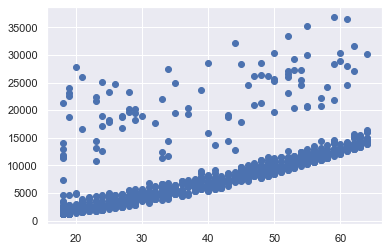

initial cost -  53993128354144.91
theta0 -  -2091.3953745523404
theta1 -  267.24834584340255
final cost -  12305294843659.19


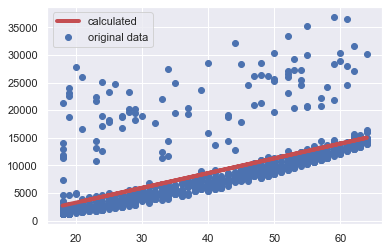

In [19]:
# Our chosen data set
plt.scatter(X, y)
plt.show()

th0 = -15
th1 = 16
alpha = 0.001
loops = 100000
print('initial cost - ', cost_func(X, y, th0, th1))

for ii in range(loops):
    temp_th0 = th0 - grad_descent_th0(X, y, alpha, th0, th1)
    temp_th1 = th1 - grad_descent_th1(X, y, alpha, th0, th1)
    th0 = temp_th0
    th1 = temp_th1
    
print('theta0 - ', th0)
print('theta1 - ', th1)
print('final cost - ', cost_func(X, y, th0, th1))

plt.plot(X, linear_func(X, th0, th1), label='calculated', c='r', linewidth=4)
plt.scatter(X, y, label='original data', c='b')
plt.legend()
plt.show()

In [20]:
# The number of features and instances for our dummy data
instances = 50
features = 3

# Creating random values for our target weights
thetai = np.random.randint(1, 9, features+1)
print(thetai)

# Creating the input data randomly
df_inputs = pd.DataFrame()
# The bias 'feature' should all be ones so we add the same bias for each instance
df_inputs['bias'] = [1] * instances
for ii in range(features):
    df_inputs['feat_'+str(ii)] = np.random.randint(1,9,instances)

# creating an empty data series for our taget values
df_targets = pd.DataFrame()
df_targets['target'] = [0] * instances

# Creating the targets from the random weights and feature values so we have a good fit to aim for
feat_bias = df_inputs.columns.tolist()
for ii, col in enumerate(feat_bias):
    df_targets['target'] += (df_inputs[col] * thetai[ii])

# requires .float() to match the weight tensor created below
targets = torch.tensor(df_targets.values).float()
inputs = torch.tensor(df_inputs.values).float()

print(df_inputs.head())
print(df_targets.head())

[3 6 7 1]
   bias  feat_0  feat_1  feat_2
0     1       7       5       6
1     1       2       2       7
2     1       2       4       7
3     1       1       5       6
4     1       6       7       3
   target
0      86
1      36
2      50
3      50
4      91


In [21]:
def linear_func_mv(x, weights):
    return  x @ weights.t()

def cost_func_mv(X, y, weights):
    mm = len(X)
    return (1/2*mm) * torch.sum((linear_func_mv(X, weights) - y)**2)

initial cost -  tensor(3896521., grad_fn=<MulBackward0>)
Improving parameters...
...time taken is 2.021963596343994 s to complete 3000 loops
final cost -  tensor(0.0005, grad_fn=<MulBackward0>)


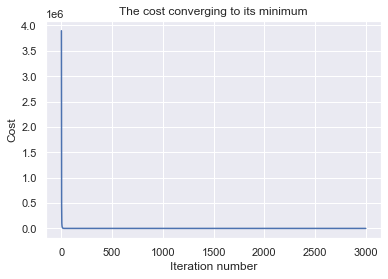


RESULTS

Pearson R -  0.9999999998773614
weights -  [3 6 7 1]
calculated weights -  tensor([[2.9979, 6.0001, 7.0002, 1.0002]], requires_grad=True)


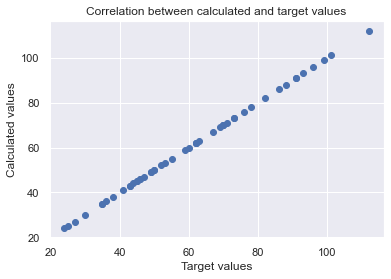

In [22]:
def mv_linear_regression_alg(inputs, targets, loops, alpha):

    # require_grad = True in order to backwards compute derivatives of the weights
    # number of weight coefficients equal to the number of features
    w = torch.randn(1, inputs.shape[1], requires_grad=True)

    print('initial cost - ', cost_func_mv(inputs, targets, w))
    print('Improving parameters...')

    cost_tracker = []

    t_mv1 = time.time()
    for i in range(loops):
        # Calculate the cost each time to analyse the current paramters
        cost = cost_func_mv(inputs, targets, w)
        # Adds the cost to a list to we ca see it change over time
        cost_tracker.append(cost_func_mv(inputs, targets, w).detach().numpy())
        # Calculating the partial derivatives
        cost.backward()
        # stop autograd from tracking history on Tensor
        with torch.no_grad():
            w -= w.grad * alpha
            # Resetting calculated derivatives to 0
            w.grad.zero_()
    t_mv2 = time.time()

    print(f'...time taken is {t_mv2 - t_mv1} s to complete {loops} loops')
    print('final cost - ', cost_func_mv(inputs, targets, w))

    return w, cost_tracker

alpha_mv = 1e-5
loops_mv = 3000
w, costs = mv_linear_regression_alg(inputs, targets, loops_mv, alpha_mv)

plt.plot(costs)
plt.title('The cost converging to its minimum')
plt.xlabel('Iteration number')
plt.ylabel('Cost')
plt.show()

print('\nRESULTS\n')
# Getting our calculated values for target from our calculated parameters
df_targets['results'] = linear_func_mv(inputs, w).t().detach().numpy()[0]
print('Pearson R - ', df_targets['target'].corr(df_targets['results']))
print('weights - ', thetai)
print('calculated weights - ', w)

plt.scatter(df_targets['target'].values, df_targets['results'].values)
plt.title('Correlation between calculated and target values')
plt.xlabel('Target values')
plt.ylabel('Calculated values')
plt.show()

In [24]:
df = pd.read_csv('Medical Price Dataset.csv')

instances_tot = df.shape[0]

# Splitting our dataset into a test and train to test our model and avoid over parameterisation
df_train = df[:int((instances_tot * 4)/5)]
df_test = df[int((instances_tot * 4)/5):]

# Inputting the features we want for our model
df_edit = pd.DataFrame()
bias = [1] * int((instances_tot * 4)/5)
df_edit['bias'] = bias
df_edit['smoker'] = df_train['smoker']
df_edit['bmi'] = df_train['bmi']
df_edit['age'] = df_train['age']
df_edit['age^2'] = df_train['age'] ** 2
df_edit['log_charges'] = np.log(df_train['charges'])

df_edit['bmi_cat'] = np.nan
df_edit.loc[df_edit['bmi'] <= 30, 'bmi_cat'] = 0
df_edit.loc[df_edit['bmi'] > 30, 'bmi_cat'] = 1

df_edit['smoker'].replace(('yes', 'no'), (1, 0), inplace=True)
df_edit['age'] = df_edit['age'] / (df_edit['age'].max() - df_edit['age'].min())
df_edit['age^2'] = df_edit['age^2'] / (df_edit['age^2'].max() - df_edit['age^2'].min())
df_edit['bmi'] = df_edit['bmi'] / (df_edit['bmi'].max() - df_edit['bmi'].min())

# splitting the features and the target ot create our inputs
df_inputs = df_edit.drop('log_charges', axis=1)
df_targets = pd.DataFrame()
df_targets['targets'] = df_edit['log_charges']

print(df_inputs.head())
print(df_targets.head())

   bias  smoker       bmi       age     age^2  bmi_cat
0     1       1  0.761879  0.413043  0.095705      0.0
1     1       0  0.922174  0.391304  0.085896      1.0
2     1       0  0.901147  0.608696  0.207847      1.0
3     1       0  0.620016  0.717391  0.288706      0.0
4     1       0  0.788640  0.695652  0.271474      0.0
    targets
0  9.734176
1  7.453302
2  8.400538
3  9.998092
4  8.260197


initial cost -  tensor(56437224., grad_fn=<MulBackward0>)
Improving parameters...
...time taken is 7.424210786819458 s to complete 10000 loops
final cost -  tensor(116910.4688, grad_fn=<MulBackward0>)

RESULTS



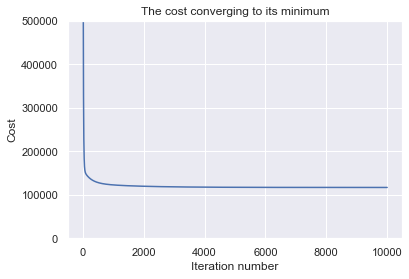

['bias', 'smoker', 'bmi', 'age', 'age^2', 'bmi_cat']
tensor([[ 6.5756,  1.5224,  0.1296,  3.2874, -1.6822,  0.1180]],
       requires_grad=True)
    targets   results
0  9.734176  9.393657
1  7.453302  7.955020
2  8.400538  8.461793
3  9.998092  8.528685
4  8.260197  8.508067
0.8718518599890156


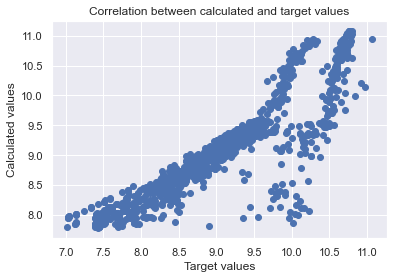

In [25]:
# Our inputs must be torch tensors
inputs = torch.tensor(df_inputs.values).float()
targets = torch.tensor(df_targets.values).float()
loops = 10000
alpha = 3e-7
# Calculating our parameters
w, costs = mv_linear_regression_alg(inputs, targets, loops, alpha)

print('\nRESULTS\n')
plt.plot(costs)
plt.title('The cost converging to its minimum')
plt.xlabel('Iteration number')
plt.ylabel('Cost')
plt.ylim(0, 5e5)
plt.show()
print(df_inputs.columns.tolist())
print(w)
# Calculating our values for the target from our calculated parameters
df_targets['results'] = linear_func_mv(inputs, w).detach().numpy()
print(df_targets.head())
print(df_targets['targets'].corr(df_targets['results']))

plt.scatter(df_targets['targets'].values, df_targets['results'].values)
plt.title('Correlation between calculated and target values')
plt.xlabel('Target values')
plt.ylabel('Calculated values')
plt.show()


Smokers gradient descent

initial cost -  tensor(3061325.2500, grad_fn=<MulBackward0>)
Improving parameters...
...time taken is 7.057654142379761 s to complete 10000 loops
final cost -  tensor(1063.8602, grad_fn=<MulBackward0>)


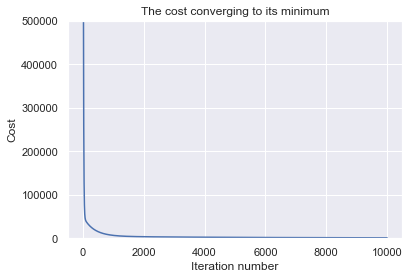


Non-smokers gradient descent

initial cost -  tensor(17909364., grad_fn=<MulBackward0>)
Improving parameters...
...time taken is 6.888890743255615 s to complete 10000 loops
final cost -  tensor(69051.2578, grad_fn=<MulBackward0>)


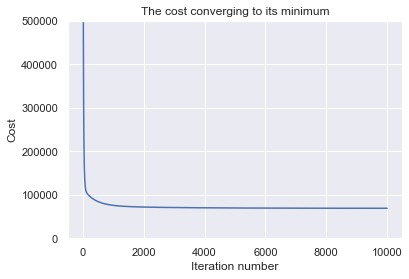

In [26]:
df_smokers_i = df_edit[df_edit['smoker'] == 1]
df_smokers_t = pd.DataFrame()
df_smokers_t['targets'] = df_smokers_i['log_charges']
df_smokers_i = df_smokers_i.drop(['log_charges', 'smoker'], axis=1)

print('\nSmokers gradient descent\n')
inputs_s = torch.tensor(df_smokers_i.values).float()
targets_s = torch.tensor(df_smokers_t.values).float()
loops = 10000
alpha = 3e-7
w_s, costs_s = mv_linear_regression_alg(inputs_s, targets_s, loops, alpha)

plt.plot(costs_s)
plt.title('The cost converging to its minimum')
plt.xlabel('Iteration number')
plt.ylabel('Cost')
plt.ylim(0, 5e5)
plt.show()

# Creating our non smokers group and forming inputs and targets
df_nonsmokers_i = df_edit[df_edit['smoker'] == 0]
df_nonsmokers_t = pd.DataFrame()
df_nonsmokers_t['targets'] = df_nonsmokers_i['log_charges']
df_nonsmokers_i = df_nonsmokers_i.drop(['log_charges', 'smoker'], axis=1)

print('\nNon-smokers gradient descent\n')
inputs_ns = torch.tensor(df_nonsmokers_i.values).float()
targets_ns = torch.tensor(df_nonsmokers_t.values).float()
loops = 10000
alpha = 3e-7
w_ns, costs_ns = mv_linear_regression_alg(inputs_ns, targets_ns, loops, alpha)

plt.plot(costs_ns)
plt.title('The cost converging to its minimum')
plt.xlabel('Iteration number')
plt.ylabel('Cost')
plt.ylim(0, 5e5)
plt.show()

In [27]:
print('\nSMOKER RESULTS\n')
# looking at the names of the features with the calculated parameters for them
print(df_smokers_i.columns.tolist())
print(w_s)
df_smokers_t['results'] = linear_func_mv(inputs_s, w_s).detach().numpy()

print('\nNON SMOKER RESULTS\n')
print(df_nonsmokers_i.columns.tolist())
print(w_ns)
df_nonsmokers_t['results'] = linear_func_mv(inputs_ns, w_ns).detach().numpy()


SMOKER RESULTS

['bias', 'bmi', 'age', 'age^2', 'bmi_cat']
tensor([[ 7.3845,  2.2236,  2.0725, -1.6400,  0.0536]], requires_grad=True)

NON SMOKER RESULTS

['bias', 'bmi', 'age', 'age^2', 'bmi_cat']
tensor([[ 6.5071, -0.1227,  3.7536, -1.8524,  0.0416]], requires_grad=True)


    targets   results
0  9.734176  9.777750
1  7.453302  7.745224
2  8.400538  8.337903
3  9.998092  8.589046
4  8.260197  8.518677
0.901052019641848


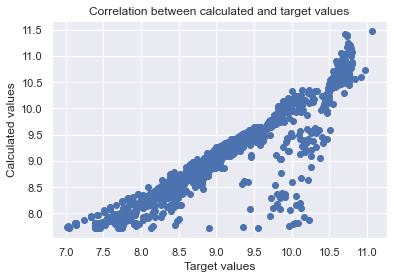

In [28]:
# Combining our final results for smokers and non smokers
df_final_i = pd.concat([df_nonsmokers_i, df_smokers_i])
df_final_i = df_final_i.sort_index()
df_final_t = pd.concat([df_nonsmokers_t, df_smokers_t])
df_final_t = df_final_t.sort_index()
print(df_final_t.head())
print(df_final_t['targets'].corr(df_final_t['results']))

plt.scatter(df_final_t['targets'].values, df_final_t['results'].values)
plt.title('Correlation between calculated and target values')
plt.xlabel('Target values')
plt.ylabel('Calculated values')
plt.show()

In [29]:
# Separating the inputs and the target data in our test group
df_targets_test = pd.DataFrame()
df_targets_test['targets'] = df_test['charges']

df_inputs_test = df_test.drop('charges', axis=1)

print(df_inputs_test.head())
print(df_targets_test.head())

      age     sex     bmi  children smoker     region
1070   37    male  37.070         1    yes  southeast
1071   63    male  31.445         0     no  northeast
1072   21    male  31.255         0     no  northwest
1073   54  female  28.880         2     no  northeast
1074   60  female  18.335         0     no  northeast
          targets
1070  39871.70430
1071  13974.45555
1072   1909.52745
1073  12096.65120
1074  13204.28565


0.8988054079569946


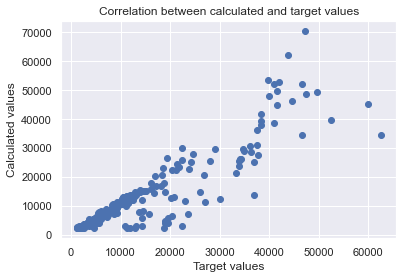

      age     sex     bmi  children smoker     region      charges   
1070   37    male  37.070         1    yes  southeast  39871.70430  \
1071   63    male  31.445         0     no  northeast  13974.45555   
1072   21    male  31.255         0     no  northwest   1909.52745   
1073   54  female  28.880         2     no  northeast  12096.65120   
1074   60  female  18.335         0     no  northeast  13204.28565   

      predicted_charges  
1070       48039.343937  
1071       15277.336116  
1072        2807.680625  
1073       11895.698149  
1074       14375.193891  


C:\Users\Rudra\AppData\Local\Temp\ipykernel_9008\2377637707.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted_charges'] = predict_changes(df_inputs_test, df_targets_test)


In [30]:
def predict_changes(dfin, dfout):
    
    # The old indexing creates problems when operating across different dataframes
    dfin = dfin.reset_index(drop=True)
    dfout = dfout.reset_index(drop=True)
    
    # We dont want the smoker feature in our inputs but we still need to to treat our two groups separately
    dfout['smoker'] = dfin['smoker']
    
    # Creating our inputs in the same way as we did to train the model
    dfin_edit = pd.DataFrame()
    dfin_edit['bias'] = [1] * dfin.shape[0]
    
    dfin_edit['bmi'] = dfin['bmi']
    dfin_edit['age'] = dfin['age']
    dfin_edit['age^2'] = dfin['age'] ** 2
    dfin_edit['bmi_cat'] = np.nan
    dfin_edit.loc[dfin_edit['bmi'] <= 30, 'bmi_cat'] = 0
    dfin_edit.loc[dfin_edit['bmi'] > 30, 'bmi_cat'] = 1

    dfin_edit['age'] = dfin_edit['age'] / (dfin_edit['age'].max() - dfin_edit['age'].min())
    dfin_edit['age^2'] = dfin_edit['age^2'] / (dfin_edit['age^2'].max() - dfin_edit['age^2'].min())
    dfin_edit['bmi'] = dfin_edit['bmi'] / (dfin_edit['bmi'].max() - dfin_edit['bmi'].min())
    
    # Go through each row, check if they are smoker, and apply the correct parameters accordingly
    dfout['results_log'] = np.nan
    for index, row in dfin_edit.iterrows():
        if dfout.loc[index, 'smoker'] == 'yes':
            xx = torch.tensor(row.values).float()
            dfout.loc[index, 'results_log'] = (xx @ w_s.t()).detach().numpy()[0]
        if dfout.loc[index, 'smoker'] == 'no':
            xx = torch.tensor(row.values).float()
            dfout.loc[index, 'results_log'] = (xx @ w_ns.t()).detach().numpy()[0]

    # Our model predicts log(charges). We want to see what the actual charges are
    dfout['results'] = math.e ** dfout['results_log']
    
    print(dfout['targets'].corr(dfout['results']))
    plt.scatter(dfout['targets'].values, dfout['results'].values)
    plt.title('Correlation between calculated and target values')
    plt.xlabel('Target values')
    plt.ylabel('Calculated values')
    plt.show()
    
    # returns the predicted charges as a list (not part of a dataframe)
    return dfout['results'].values


df_test['predicted_charges'] = predict_changes(df_inputs_test, df_targets_test)

print(df_test.head())